In [195]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

pd.set_option("display.precision", 2)

# **EnergyScore Veri Seti**

In [196]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Assignment1/Datasets/EnergyStarScore.xlsx', 'Sayfa1');

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Sample

Veri seti hakkında bilgi edinmek için verilerin rastgele %1'inin gösterilmiştir.

In [197]:
dataset.sample(frac=0.01)

,Bina Adı,Bina Tipi,BA,BEKY,SGE,SGY,BTE,ESS
525,GAVIN,K-12 School,108387.0,43.50,298.50,2.80,4.71e+06,96.0
780,5 Channel Center,Office,52500.0,72.30,284.60,5.40,3.80e+06,64.0
156,Marketplace Lofts Limited Partnership,Multifamily Housing,72600.0,40.00,237.20,3.30,2.90e+06,74.0
872,Park Associates,Multifamily Housing,40000.0,170.30,424.40,10.60,6.81e+06,6.0
859,DFCI - Yawkey Building,Medical Office,291451.0,413.70,8350.50,28.70,1.21e+08,4.0
928,261 AUSONIA HOMES,Multifamily Housing,49500.0,161.61,501.97,10.14,8.00e+06,NaN
90,Bradley Properties,Multifamily Housing,67500.0,121.60,509.50,7.50,8.21e+06,6.0
892,101 CHARLESTOWN,Multifamily Housing,835225.0,150.31,7710.95,9.23,1.26e+08,NaN
104,The langham Boston,Hotel,280000.0,75.50,274.90,0.98,2.11e+07,41.0
111,141 tremont street,Office,64884.0,84.40,529.90,8.20,5.48e+06,38.0


## Sütunlara Erişmek

BA ve SGE arasındaki sütünlardan rastgele %1'i gösterilmiştir.

In [198]:
dataset.loc[:,"BA":"SGE"].sample(frac=0.01)

,BA,BEKY,SGE
264,42860.0,99.40,328.20
272,74655.0,126.60,565.70
829,130204.0,27.30,259.00
96,152212.0,104.00,923.80
715,108832.0,63.60,408.20
943,224000.0,146.05,2011.96
666,27777.0,49.60,85.10
496,39528.0,82.10,186.30
89,127689.0,135.50,1372.20
156,72600.0,40.00,237.20


## Info

Verilerin sütunlara göre kaç adet non-null veri içerdiği ve veri tipinin gösterimi yapılmıştır.

In [199]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bina Adı   950 non-null    object 
 1   Bina Tipi  936 non-null    object 
 2   BA         936 non-null    float64
 3   BEKY       893 non-null    float64
 4   SGE        934 non-null    float64
 5   SGY        928 non-null    float64
 6   BTE        896 non-null    float64
 7   ESS        736 non-null    float64
dtypes: float64(6), object(2)
memory usage: 59.5+ KB


## Describe

Veri setinin istatiksel bilgilerinin gösterilmiştir (count mean std vb)

In [200]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
BA,936.0,2.08e+05,3.52e+05,100.0,5.58e+04,1.01e+05,2.03e+05,4.64e+06
BEKY,893.0,8.32e+02,1.84e+04,0.1,5.43e+01,7.37e+01,1.04e+02,5.46e+05
SGE,934.0,3.41e+03,3.26e+04,-211.7,2.23e+02,4.98e+02,1.21e+03,8.01e+05
SGY,928.0,5.32e+01,1.20e+03,-0.4,3.60e+00,5.40e+00,7.39e+00,3.62e+04
BTE,896.0,5.25e+07,5.19e+08,5524.0,3.54e+06,7.36e+06,1.69e+07,1.21e+10
ESS,736.0,6.72e+01,3.04e+01,1.0,4.60e+01,7.70e+01,9.30e+01,1.00e+02


## Korelasyon

Sürunlar arası korelasyon bilgisinin matrix olarak gösterilmiştir.

In [201]:
dataset.corr()

,BA,BEKY,SGE,SGY,BTE,ESS
BA,1.00,-0.02,0.10,-0.02,0.08,-0.04
BEKY,-0.02,1.00,0.38,1.00,0.37,-0.10
SGE,0.10,0.38,1.00,0.38,1.00,-0.17
SGY,-0.02,1.00,0.38,1.00,0.37,-0.10
BTE,0.08,0.37,1.00,0.37,1.00,-0.17
ESS,-0.04,-0.10,-0.17,-0.10,-0.17,1.00


## Heatmap

Heatmap ile sütünlar arası korelasyonun görselleştirilmiştir.

<AxesSubplot:>

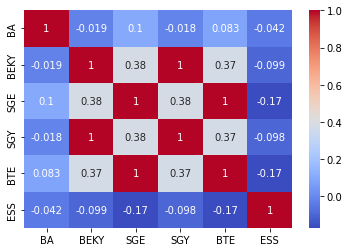

In [202]:
sb.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

## Scatter 

Aralarında korelasyona göre güçlü bir ilişki bulunan SGE ve BEKY sütunlarının değer dağılımları scatter üstünde görselleştirilmiştir.

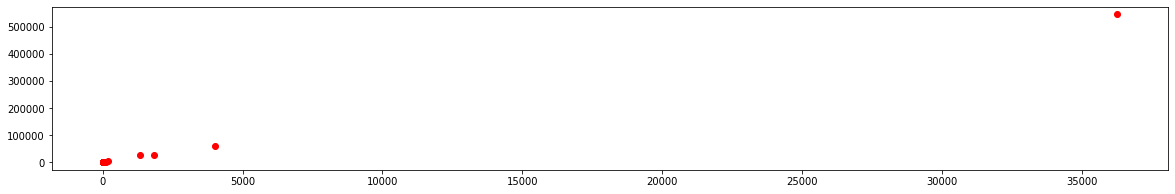

In [203]:
plt.figure(figsize=(20,3))
plt.scatter(dataset['SGY'], dataset['BEKY'], c='red')

## Verilerin Görselleştirilmesi

matplotlib.pyplot kütüphanesi kullanılarak verisetinin sütunlara göre değerlerinin barchart üzerinde gösterilmeye çalışılmıştır.


In [204]:
def values(column, columName):
  counts = column.value_counts()
  plt.figure(figsize=(20,9))
  plt.bar(counts.index, counts)
  plt.xticks(counts.index, counts.index.values)
  plt.ylabel("frekans")
  plt.title(columnName)
  plt.show()

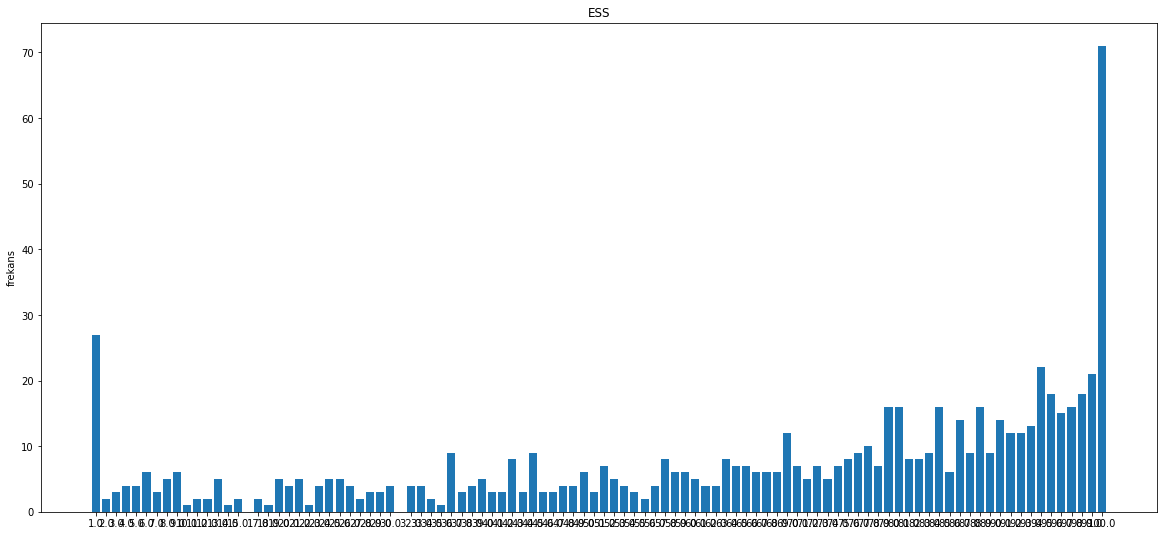

In [205]:
for columnName in ["ESS"]: # "BA", "BEKY",	"SGE",	"SGY",	"BTE",	"ESS"
  values(dataset[columnName], columnName)

## Histogram

Sayısal verilerin histogramı gösterilmiştir.

In [206]:
def histogram(column, columName):
  plt.figure(figsize=(12,3))
  plt.hist(column.sort_values())
  plt.xlabel(columnName)
  plt.ylabel("frekans")
  plt.title(columnName)
  plt.show()

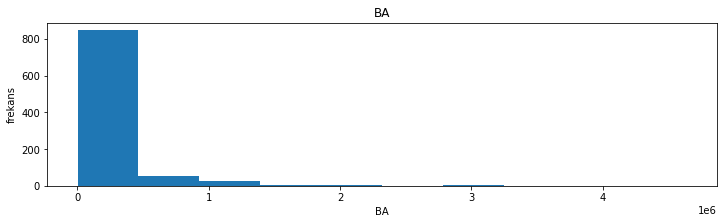

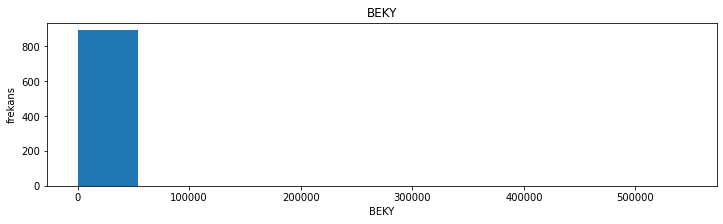

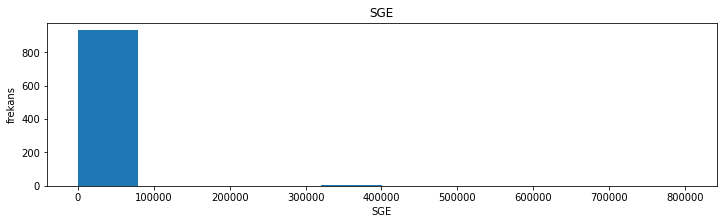

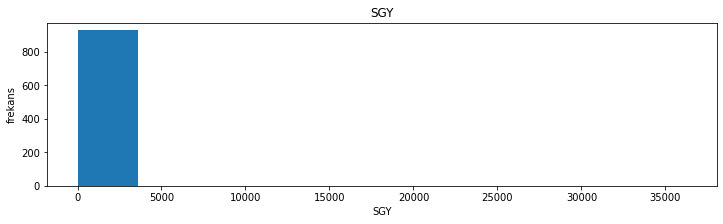

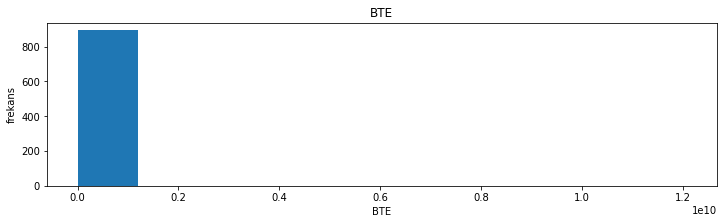

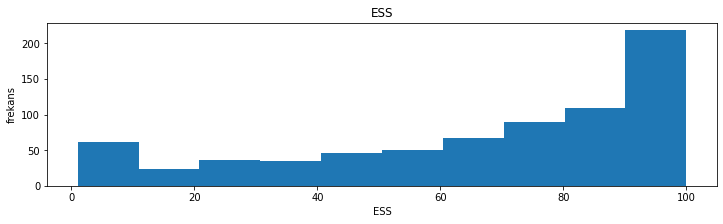

In [207]:
for columnName in ["BA", "BEKY",	"SGE",	"SGY",	"BTE",	"ESS"]:
  histogram(dataset[columnName], columnName)

# **ödev2 Veri seti**

In [224]:
dataset2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Assignment1/Datasets/ödev2.xlsx', 'Sheet1')

## Rename

İlk sütun, veri setinde isimlendirilmediği 'id' ismiyle isimlendirilmiştir.

In [225]:
dataset2.rename(columns={'Unnamed: 0':'id'}, inplace=True )
dataset2.columns

Index(['id', 'country name', 'current population', 'population 2022', 'area',
       'land area', 'density', 'growth rate', 'world percentage', 'rank'],
      dtype='object')

## Sample

Verilerin rastgele %5'ine erişilmiştir.

In [226]:
dataset2.sample(frac=0.05)

,id,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
203,203.0,Tuvalu,"11,396","11,312",26,30,380,0.74%,0.00%,227
14,14.0,Dr Congo,"100,880,253","99,010,212",2.3M,2.3M,45,3.29%,1.28%,15
21,21.0,Tanzania,"66,619,107","65,497,748",945.1K,885.8K,76,2.96%,0.84%,22
75,75.0,Rwanda,"13,961,695","13,776,698",26.3K,24.7K,571,2.31%,0.18%,76
158,158.0,Eswatini,"1,206,872","1,201,670",17.4K,17.2K,70,0.76%,0.02%,159
105,105.0,Nicaragua,"7,005,492","6,948,392",130.4K,120.3K,59,1.41%,0.09%,106
178,178.0,Martinique,"366,981","367,507",1.1K,1.1K,325,-0.14%,0.00%,180
173,173.0,Brunei,"451,207","449,002",5.8K,5.3K,86,0.78%,0.01%,175
140,140.0,Gambia,"2,744,200","2,705,992",10.7K,10.1K,274,2.48%,0.03%,141
175,175.0,Belize,"408,192","405,272",23K,22.8K,18,1.37%,0.01%,177


## Verilerin Düzenlenmesi

Bu veri setinde bazı sütunların sayısal gibi göründüğü halde string tipinde olduğu farkedilmiştir bunun için dönüşüm yapılmıştır.

In [227]:
def fixPop(value):
  return int(str(value).replace(",", ""))

def fixFloat(value):
  return float(str(value).replace(",", ""))

def fixArea(value):
  value = str(value).replace(",", "").replace("<", "").strip()
  if "K" in value:
    value = str(value).replace("K", "") + "000"
  elif "M" in value:
    value = str(value).replace("M", "") + "000000"

  return float(value)

def fixPer(value):
  return float(str(value).replace("%", ""))

In [228]:
dataset2['current population'] = dataset2['current population'].apply(fixPop)
dataset2['population 2022'] = dataset2['population 2022'].apply(fixPop)
dataset2['area'] = dataset2['area'].apply(fixArea)
dataset2['land area'] = dataset2['land area'].apply(fixArea)
dataset2['density'] = dataset2['density'].apply(fixFloat)
dataset2['rank'] = dataset2['rank'].apply(fixFloat)
dataset2['growth rate'] = dataset2['growth rate'].apply(fixPer)
dataset2['world percentage'] = dataset2['world percentage'].apply(fixPer)
dataset2.sample(frac=0.05)

,id,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
174,174.0,Bahamas,411306,409984,13.9,10000.0,41.0,0.64,0.01,176.0
117,117.0,Finland,5544158,5540745,338.4,303.9,18.0,0.09,0.07,118.0
146,146.0,Lesotho,2319784,2305825,30.4,30.4,77.0,1.06,0.03,147.0
86,86.0,Sweden,10585752,10549347,450.3,407.3,26.0,0.59,0.13,87.0
202,202.0,Nauru,12780,12668,21.0,20.0,639.0,0.88,0.00,225.0
109,109.0,Bulgaria,6723268,6781953,110.9,108.6,62.0,-1.39,0.08,110.0
69,69.0,Guatemala,17986689,17843908,108.9,107.2,169.0,1.39,0.23,70.0
180,180.0,Vanuatu,331873,326740,12.2,12.2,27.0,2.38,0.00,182.0
198,198.0,Liechtenstein,39584,39327,160.0,160.0,247.0,0.65,0.00,216.0
61,61.0,Malawi,20709226,20405317,118.5,94.3,222.0,2.58,0.26,62.0


## Sütunlara erişmek

'country name' ile 'population 2022' arasındaki sütunların verilerinin %5'i  gösterilmiştir.

In [229]:
dataset2.loc[:,'country name':'population 2022'].sample(frac=0.05)

,country name,current population,population 2022
4,Pakistan,238517163,235824862
159,Djibouti,1129871,1120849
59,Syria,22754313,22125249
132,Mongolia,3427406,3398366
75,Rwanda,13961695,13776698
180,Vanuatu,331873,326740
50,Ivory Coast,28570189,28160542
202,Nauru,12780,12668
74,Guinea,14051040,13859341
48,Nepal,30751751,30547580


## Info

Verilerin sütunlara göre kaç adet non-null veri içerdiği ve veri tipinin gösterimi yapılmıştır.

In [230]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  205 non-null    float64
 1   country name        205 non-null    object 
 2   current population  205 non-null    int64  
 3   population 2022     205 non-null    int64  
 4   area                205 non-null    float64
 5   land area           205 non-null    float64
 6   density             205 non-null    float64
 7   growth rate         205 non-null    float64
 8   world percentage    204 non-null    float64
 9   rank                205 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 16.1+ KB


## Describe

Veri setinin istatiksel bilgilerinin gösterilmiştir (count mean std vb)

In [231]:
dataset2.describe()

,id,current population,population 2022,area,land area,density,growth rate,world percentage,rank
count,205.00,2.05e+02,2.05e+02,2.05e+02,2.05e+02,205.00,205.00,204.00,205.00
mean,102.00,3.91e+07,3.89e+07,9.25e+04,8.57e+04,344.06,1.06,0.49,104.35
std,59.32,1.46e+08,1.46e+08,7.22e+05,6.72e+05,1482.72,1.28,1.83,61.59
min,0.00,5.18e+02,5.10e+02,1.00e+00,1.00e+00,0.14,-7.45,0.00,1.00
25%,51.00,1.48e+06,1.47e+06,2.08e+01,2.16e+01,35.00,0.31,0.02,52.00
50%,102.00,7.59e+06,7.53e+06,1.18e+02,1.29e+02,95.00,0.89,0.11,103.00
75%,153.00,2.86e+07,2.82e+07,4.75e+02,4.70e+02,235.00,1.92,0.36,154.00
max,204.00,1.43e+09,1.43e+09,1.00e+07,9.00e+06,18149.00,4.98,17.85,234.00


## Korelasyon

Sürunlar arası korelasyon bilgisinin matrix olarak gösterilmiştir.

In [232]:
dataset2.corr()

,id,current population,population 2022,area,land area,density,growth rate,world percentage,rank
id,1.00,-3.74e-01,-3.73e-01,-1.07e-01,-0.12,0.13,-0.15,-3.75e-01,1.00
current population,-0.37,1.00e+00,1.00e+00,4.71e-03,0.21,-0.02,-0.04,1.00e+00,-0.37
population 2022,-0.37,1.00e+00,1.00e+00,4.66e-03,0.20,-0.02,-0.04,1.00e+00,-0.37
area,-0.11,4.71e-03,4.66e-03,1.00e+00,0.92,-0.03,0.01,4.33e-03,-0.11
land area,-0.12,2.05e-01,2.05e-01,9.21e-01,1.00,-0.02,0.01,2.05e-01,-0.12
density,0.13,-1.88e-02,-1.88e-02,-2.75e-02,-0.02,1.00,-0.12,-1.81e-02,0.14
growth rate,-0.15,-3.68e-02,-3.88e-02,1.32e-02,0.01,-0.12,1.00,-3.58e-02,-0.15
world percentage,-0.38,1.00e+00,1.00e+00,4.33e-03,0.21,-0.02,-0.04,1.00e+00,-0.37
rank,1.00,-3.66e-01,-3.66e-01,-1.06e-01,-0.12,0.14,-0.15,-3.68e-01,1.00


## Heatmap

Heatmap ile sütünlar arası korelasyonun görselleştirilmiştir.

<AxesSubplot:>

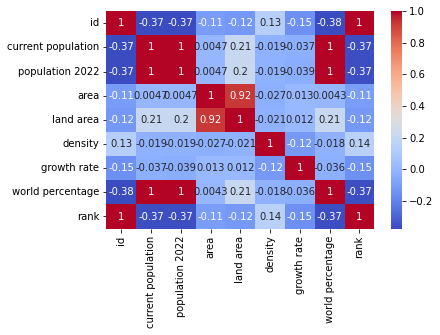

In [233]:
sb.heatmap(dataset2.corr(), annot=True, cmap="coolwarm")

## Scatter

Aralarında korelasyona göre güçlü bir ilişki bulunan "area" ve "current population" sütunlarının değer dağılımları scatter üstünde görselleştirilmiştir.

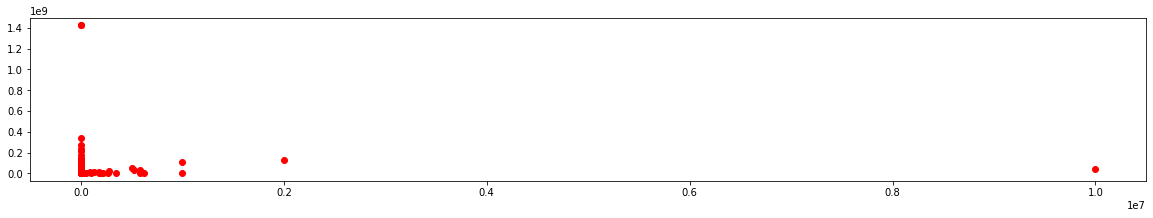

In [234]:
plt.figure(figsize=(20,3))
plt.scatter(dataset2['area'], dataset2['current population'], c='red')

Tüm değişkenlerin birbiriyle ilişkisi gösterilmiştir.

## Histogram

Sayısal sütunların histogram grafi gösterilmiştir.

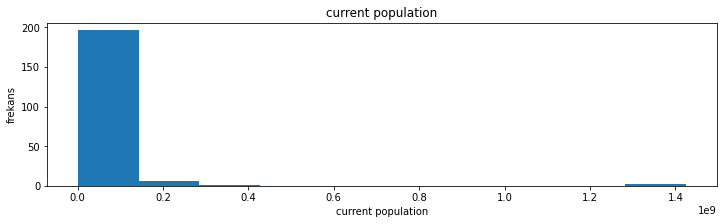

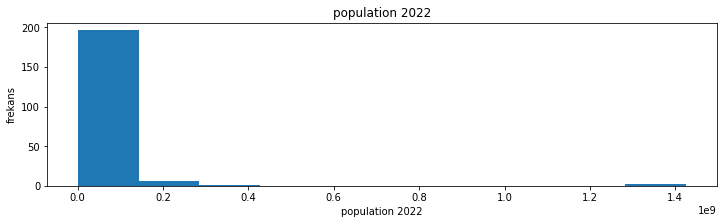

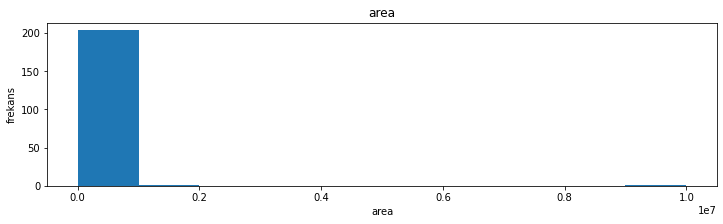

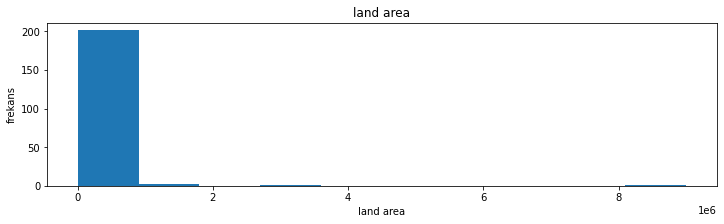

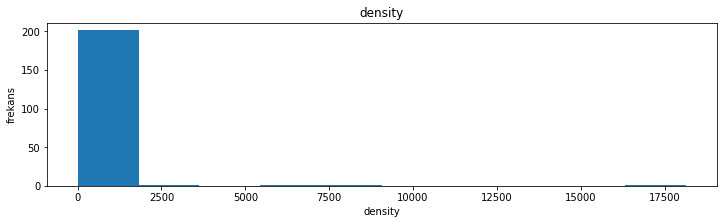

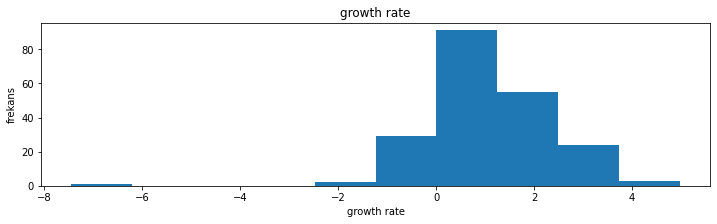

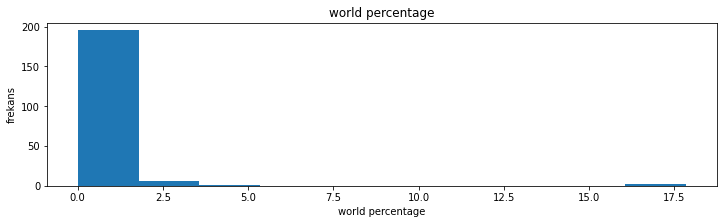

In [235]:
for columnName in ["current population",	"population 2022",	"area",	"land area",	"density",	"growth rate",	"world percentage"]:
  histogram(dataset2[columnName], columnName)

İlk 5 ülkenin nüfusları bar chart üzerinde gösterilmiştir.

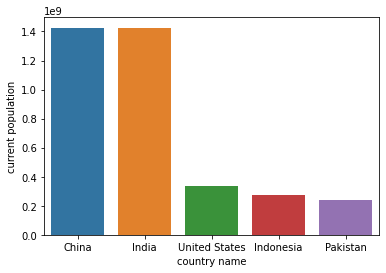

In [236]:
sb.barplot(x="country name", y="current population", data=dataset2.sort_values("current population", ascending=False).head());

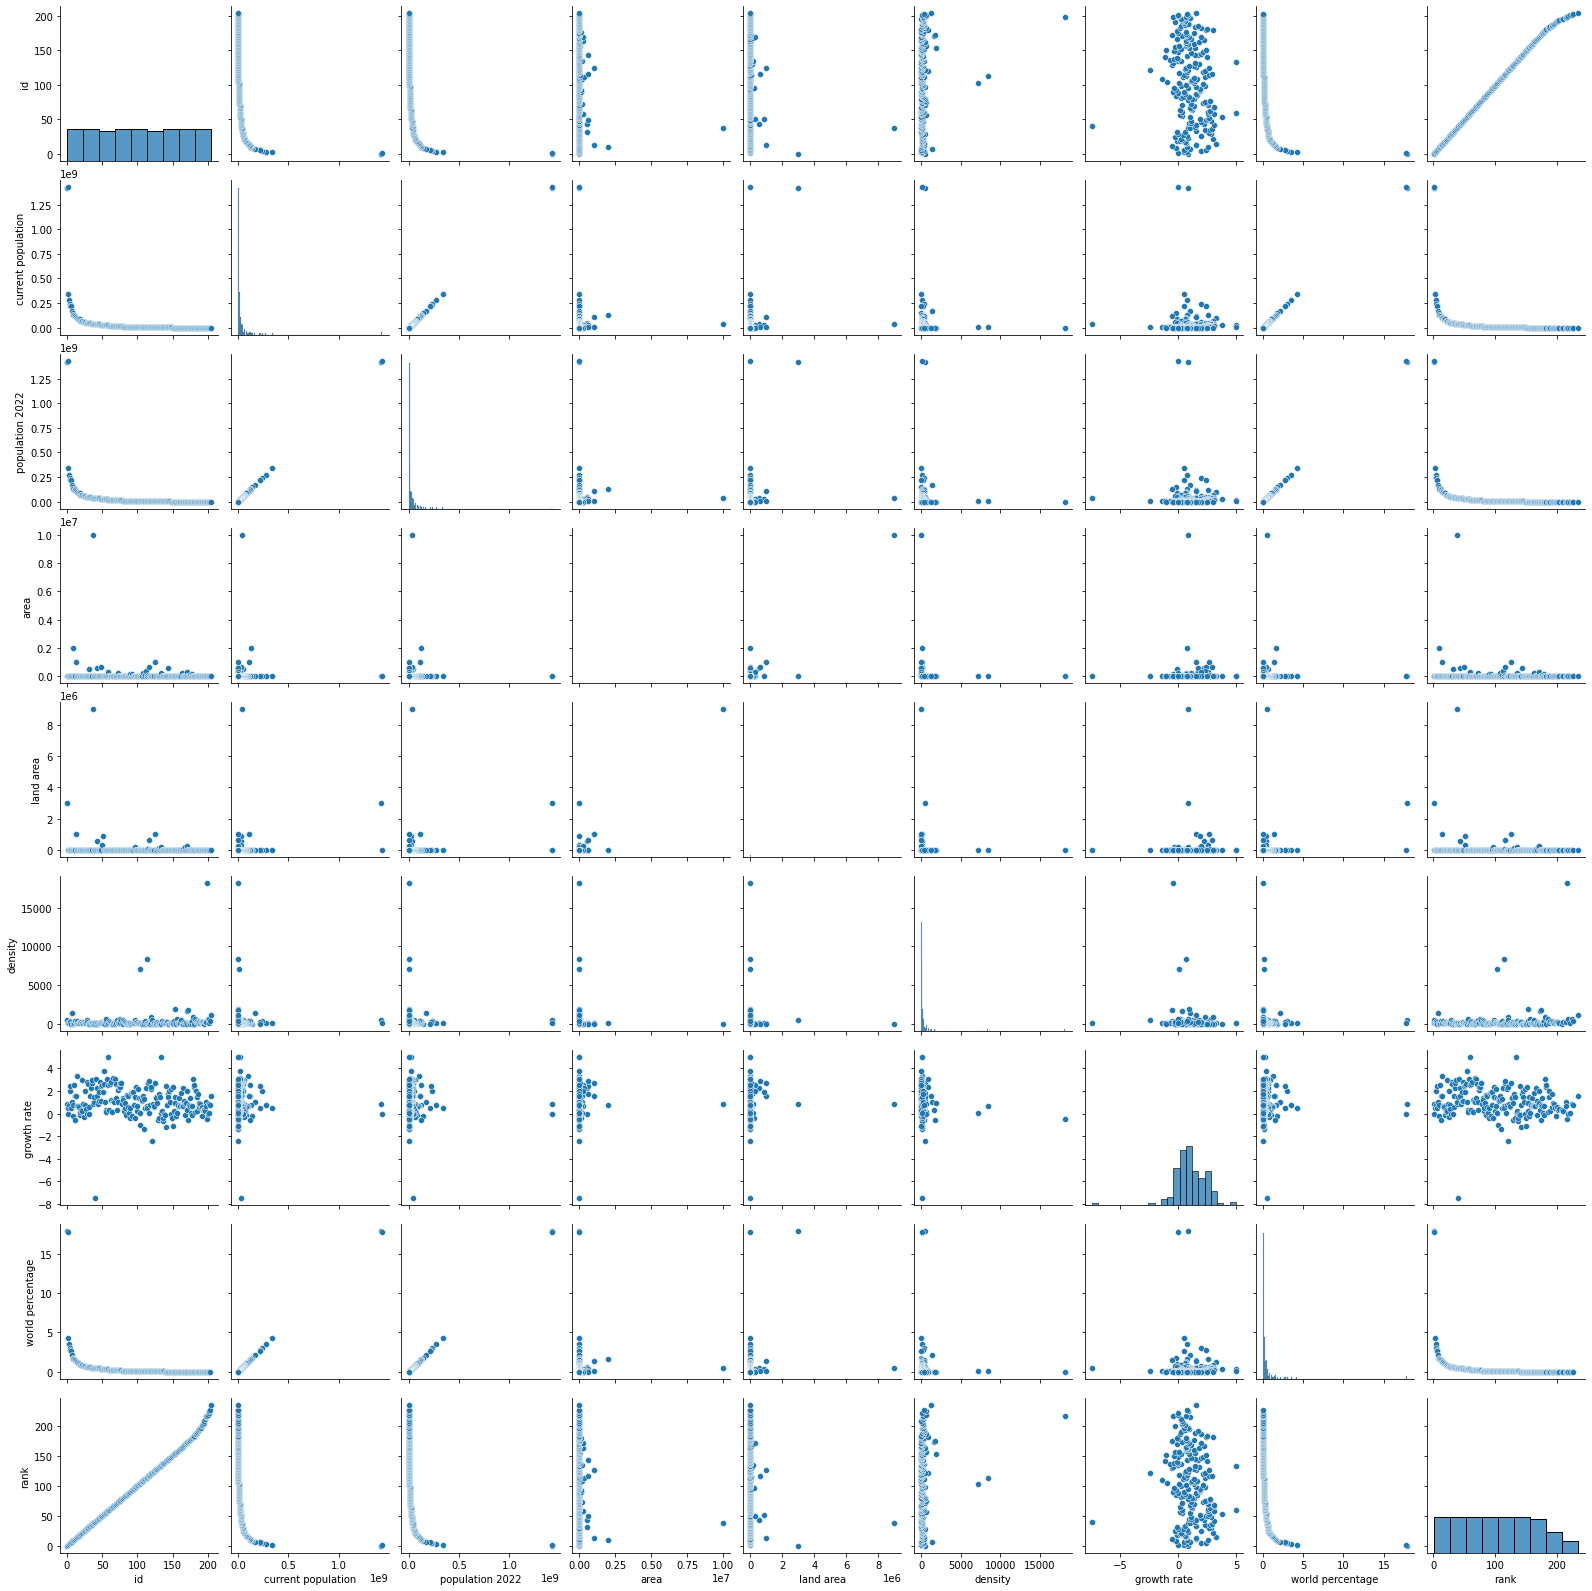

In [239]:
sb.pairplot(dataset2);

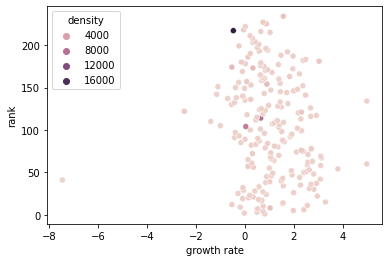

In [237]:
sb.scatterplot(x="growth rate", y="rank", hue="density", data=dataset2);